In [1]:
##Imported Basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
##For Timeseries RNN Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [3]:
import tensorflow as tf

In [4]:
##Import Keras:TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

##Import Keras: MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [5]:
#Using Numpy created a sample sine wave 

x = np.linspace(0,50,969)
y = np.sin(x)

In [6]:
x

array([ 0.        ,  0.05165289,  0.10330579,  0.15495868,  0.20661157,
        0.25826446,  0.30991736,  0.36157025,  0.41322314,  0.46487603,
        0.51652893,  0.56818182,  0.61983471,  0.6714876 ,  0.7231405 ,
        0.77479339,  0.82644628,  0.87809917,  0.92975207,  0.98140496,
        1.03305785,  1.08471074,  1.13636364,  1.18801653,  1.23966942,
        1.29132231,  1.34297521,  1.3946281 ,  1.44628099,  1.49793388,
        1.54958678,  1.60123967,  1.65289256,  1.70454545,  1.75619835,
        1.80785124,  1.85950413,  1.91115702,  1.96280992,  2.01446281,
        2.0661157 ,  2.1177686 ,  2.16942149,  2.22107438,  2.27272727,
        2.32438017,  2.37603306,  2.42768595,  2.47933884,  2.53099174,
        2.58264463,  2.63429752,  2.68595041,  2.73760331,  2.7892562 ,
        2.84090909,  2.89256198,  2.94421488,  2.99586777,  3.04752066,
        3.09917355,  3.15082645,  3.20247934,  3.25413223,  3.30578512,
        3.35743802,  3.40909091,  3.4607438 ,  3.51239669,  3.56

In [7]:
y

array([ 0.        ,  0.05162993,  0.10312214,  0.15433927,  0.20514472,
        0.25540296,  0.30497993,  0.35374339,  0.40156326,  0.44831199,
        0.49386489,  0.53810043,  0.58090063,  0.62215132,  0.66174246,
        0.69956845,  0.7355284 ,  0.76952637,  0.80147169,  0.83127914,
        0.85886922,  0.88416832,  0.90710897,  0.92762996,  0.94567658,
        0.96120066,  0.97416082,  0.98452247,  0.99225798,  0.99734671,
        0.99977509,  0.99953664,  0.996632  ,  0.99106891,  0.98286222,
        0.97203382,  0.95861258,  0.94263432,  0.92414164,  0.90318389,
        0.87981695,  0.85410317,  0.82611113,  0.79591549,  0.76359681,
        0.72924129,  0.69294057,  0.65479148,  0.61489579,  0.5733599 ,
        0.53029461,  0.48581481,  0.44003912,  0.39308967,  0.34509167,
        0.29617317,  0.24646465,  0.1960987 ,  0.14520967,  0.0939333 ,
        0.04240638, -0.00923366, -0.06084907, -0.11230217, -0.16345572,
       -0.21417325, -0.2643195 , -0.31376069, -0.36236494, -0.41

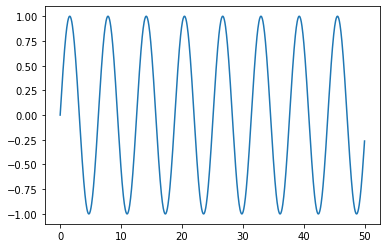

In [8]:
plt.plot(x, y)

In [9]:
## Loading the data into pandas dataframe
## Index: x; Data: y; column label: Sine

df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [10]:
df.head()

,Sine
0.000000,0.000000
0.051653,0.051630
0.103306,0.103122
0.154959,0.154339
0.206612,0.205145


In [11]:
len(df)

969

In [12]:
## Percentage of data used for Testing

test_percent = 0.1

In [13]:
## Number of data points reserved for testing the model
## 20% of the original dataset

len(df)*test_percent

96.9

In [14]:
## Finding the length (number of data points) of the testing dataset
## It has been found (above) that around 154 data points are used for testing

test_length = np.round(len(df)*test_percent)

In [15]:
test_length

97.0

In [16]:
## Testing data set starts at this index
## Index starting with 0

test_start_index = int(len(df) - test_length)

In [17]:
test_start_index

872

In [18]:
## Created Separate Training / Testing datasets

## Training dataset: All the indices from start to test_start_index
## (excluding test_start_index)
data_train = df.iloc[: test_start_index]

## Testing dataset: All the indices fromt test_start_index to the end of the dataframe
## (including test_start_index)
data_test = df.iloc[test_start_index :]


In [19]:
data_train.head(5)

,Sine
0.000000,0.000000
0.051653,0.051630
0.103306,0.103122
0.154959,0.154339
0.206612,0.205145


In [20]:
data_test.head(5)

,Sine
45.041322,0.871878
45.092975,0.896000
45.144628,0.917731
45.196281,0.937015
45.247934,0.953799


In [21]:
## Run a MinMaxScaler to Normalize the data
scaler = MinMaxScaler()

In [22]:
## Just Converting the data to floats (Ignore Warning)
## ONLY scale the TRAINING data - NOT scale testing data

## Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [23]:
## Normalizing Training dataset
normalized_train = scaler.transform(data_train)

## Normalizing Testing dataset
normalized_test = scaler.transform(data_test)

In [24]:
## TimeseriesGenerator: Generate time series batches for training/testing

## Set the length of the input sequence
## Use 60 historical data points to predict the next one
length = 60

## batch_size: Number of time series samples in each batch
## one sample: each sample is a time series input sequence
## only one sample in each batch
batch_size = 1

## Created a TimeseriesGenerator for training: training_tsGenerator
# -->> Timeseries generator produces time series batches used to train the model
# TimeseriesGenerator(inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [25]:
len(normalized_train)

872

In [26]:
## First batch 
X,y = train_tsGenerator60[0]

In [27]:
## Print X.flatten()

X.flatten()

array([0.49999762, 0.52581272, 0.55155896, 0.57716766, 0.60257052,
       0.62769977, 0.65248839, 0.67687025, 0.70078031, 0.7241548 ,
       0.74693136, 0.76904925, 0.79044946, 0.81107492, 0.83087059,
       0.84978369, 0.86776376, 0.88476283, 0.90073558, 0.91563938,
       0.92943449, 0.94208411, 0.95355449, 0.96381505, 0.9728384 ,
       0.98060048, 0.9870806 , 0.99226145, 0.99612922, 0.9986736 ,
       0.9998878 , 0.99976857, 0.99831624, 0.99553469, 0.99143132,
       0.98601709, 0.97930644, 0.97131726, 0.96207088, 0.95159194,
       0.93990841, 0.92705145, 0.91305536, 0.89795746, 0.88179804,
       0.86462019, 0.84646973, 0.82739509, 0.80744713, 0.78667908,
       0.76514632, 0.7429063 , 0.72001834, 0.69654349, 0.67254437,
       0.64808499, 0.62323059, 0.59804749, 0.57260284, 0.54696452])

In [28]:
## Print y: To know the X prediction

y

array([[0.52120092]])

In [29]:
## Dataset: Only one column/attribute: Sine Values of index X
# Features: How many features used to train the model: Only one
n_Features = 1

## Model Defined
model = Sequential()

# Add a simple RNN layer: Using SimpleRRN cells
# This layer has 100 neurons: One neuron for each input data point
# Notes: # time series steps of the input sequence: 100
model.add(SimpleRNN(100, input_shape=(length, n_Features)))

# Add a FC (fully-connected) layer for the final prediction
# Only one neuro of the Dense/Fully-Connected layer
# --> Output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))

In [30]:
## Compile the model
## Loss function: MSE (Mean Squared Errors)
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


# Train (Fit) Model

In [31]:
## Fit the Model
# Use fit_generator(), Not fit()

model.fit_generator(train_tsGenerator60, epochs=5)

C:\Users\anand\AppData\Local\Temp\ipykernel_7568\3392127610.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=5)


Epoch 1/5
812/812 [==============================] - 8s 8ms/step - loss: 0.0045
Epoch 2/5
812/812 [==============================] - 11s 13ms/step - loss: 2.8411e-04
Epoch 3/5
812/812 [==============================] - 8s 10ms/step - loss: 1.7683e-04
Epoch 4/5
812/812 [==============================] - 10s 12ms/step - loss: 9.7085e-05
Epoch 5/5
812/812 [==============================] - 8s 10ms/step - loss: 5.2410e-04


<AxesSubplot:>

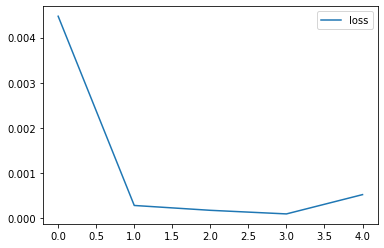

In [32]:
## Loaded the loss data (model.history.history) into a data frame
df_model_loss = pd.DataFrame(model.history.history)

## Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

In [33]:
## Number of time steps of the input time series
length

60

In [34]:
# 1st time series batch (60 data points)
# array[-length:]: A sequence of [60th to the last .. last]
first_eval_batch = normalized_train[-length :]

first_eval_batch

array([[5.40645044e-02],
       [4.29828626e-02],
       [3.31202747e-02],
       [2.45030487e-02],
       [1.71541702e-02],
       [1.10932420e-02],
       [6.33643115e-03],
       [2.89642603e-03],
       [7.82402647e-04],
       [0.00000000e+00],
       [5.51305096e-04],
       [2.43484737e-03],
       [5.64560260e-03],
       [1.01750063e-02],
       [1.60109767e-02],
       [2.31379467e-02],
       [3.15369056e-02],
       [4.11854499e-02],
       [5.20578426e-02],
       [6.41250826e-02],
       [7.73549812e-02],
       [9.17122487e-02],
       [1.07158588e-01],
       [1.23652797e-01],
       [1.41150880e-01],
       [1.59606160e-01],
       [1.78969409e-01],
       [1.99188979e-01],
       [2.20210934e-01],
       [2.41979200e-01],
       [2.64435711e-01],
       [2.87520567e-01],
       [3.11172190e-01],
       [3.35327492e-01],
       [3.59922039e-01],
       [3.84890228e-01],
       [4.10165457e-01],
       [4.35680308e-01],
       [4.61366720e-01],
       [4.87156177e-01],


In [35]:
first_eval_batch = first_eval_batch.reshape((1, length, n_Features))

first_eval_batch

array([[[5.40645044e-02],
        [4.29828626e-02],
        [3.31202747e-02],
        [2.45030487e-02],
        [1.71541702e-02],
        [1.10932420e-02],
        [6.33643115e-03],
        [2.89642603e-03],
        [7.82402647e-04],
        [0.00000000e+00],
        [5.51305096e-04],
        [2.43484737e-03],
        [5.64560260e-03],
        [1.01750063e-02],
        [1.60109767e-02],
        [2.31379467e-02],
        [3.15369056e-02],
        [4.11854499e-02],
        [5.20578426e-02],
        [6.41250826e-02],
        [7.73549812e-02],
        [9.17122487e-02],
        [1.07158588e-01],
        [1.23652797e-01],
        [1.41150880e-01],
        [1.59606160e-01],
        [1.78969409e-01],
        [1.99188979e-01],
        [2.20210934e-01],
        [2.41979200e-01],
        [2.64435711e-01],
        [2.87520567e-01],
        [3.11172190e-01],
        [3.35327492e-01],
        [3.59922039e-01],
        [3.84890228e-01],
        [4.10165457e-01],
        [4.35680308e-01],
        [4.6

In [36]:
first_eval_batch.shape

(1, 60, 1)

# Evaluate Model

In [37]:
## ALl the codes for Evaluation

## Declare a list to store all the predictions
# Similar to: test_predictions = list();
test_predictions = []

# Get the first time series batch for testing
# The 1st batch: The 1st time series input sequence
# = the last 60 data points of the train data set
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x length x #features
current_batch = first_eval_batch.reshape((1, length, n_Features))

# Run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):

 ## Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]
    
 ## store prediction into the list of predictions
    test_predictions.append(current_pred)
    
 # -->> Drop the first data point of the current input sequence
 # -->> Append the newly-predicted value to the tail of the input sequence
 # -->> Maintain the number of time series steps: 60
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 28ms/step


In [38]:
## Convert the Scaled Result back to the Real Values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions

array([[ 0.86805791],
       [ 0.89213091],
       [ 0.9110442 ],
       [ 0.92763662],
       [ 0.9418873 ],
       [ 0.95280526],
       [ 0.96136683],
       [ 0.96823098],
       [ 0.97088981],
       [ 0.97211074],
       [ 0.97078908],
       [ 0.9666486 ],
       [ 0.96060842],
       [ 0.95215057],
       [ 0.94125311],
       [ 0.92858885],
       [ 0.91384453],
       [ 0.89682714],
       [ 0.87831177],
       [ 0.85775221],
       [ 0.83582759],
       [ 0.81184745],
       [ 0.7865925 ],
       [ 0.75973765],
       [ 0.73137481],
       [ 0.70172392],
       [ 0.67066661],
       [ 0.63825222],
       [ 0.60482898],
       [ 0.57004913],
       [ 0.53419212],
       [ 0.49740051],
       [ 0.45946319],
       [ 0.42055205],
       [ 0.38096119],
       [ 0.34018396],
       [ 0.29882904],
       [ 0.2567224 ],
       [ 0.21381527],
       [ 0.17031626],
       [ 0.12637929],
       [ 0.08160833],
       [ 0.03674904],
       [-0.00868115],
       [-0.05444738],
       [-0

In [39]:
#Update data_test
data_test

,Sine
45.041322,0.871878
45.092975,0.896000
45.144628,0.917731
45.196281,0.937015
45.247934,0.953799
...,...
49.793388,-0.454752
49.845041,-0.408163
49.896694,-0.360485
49.948347,-0.311846


In [40]:
# Copied the true values of predictions into the data frame of original test data
# Added as another column

data_test['Predictions'] = true_predictions

C:\Users\anand\AppData\Local\Temp\ipykernel_7568\243151973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [41]:
## Update data_test
data_test

,Sine,Predictions
45.041322,0.871878,0.868058
45.092975,0.896000,0.892131
45.144628,0.917731,0.911044
45.196281,0.937015,0.927637
45.247934,0.953799,0.941887
...,...,...
49.793388,-0.454752,-0.687556
49.845041,-0.408163,-0.640554
49.896694,-0.360485,-0.591127
49.948347,-0.311846,-0.539308


<AxesSubplot:>

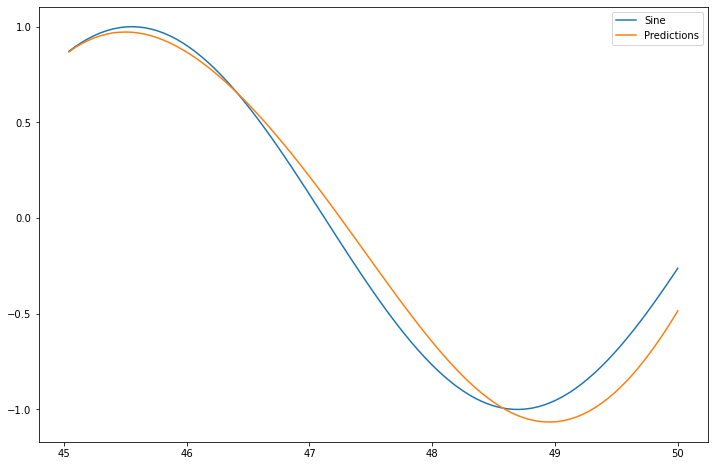

In [42]:
## Visualize the data of the updated test data with Plot
## Compare the predicted sine wave against the original sine wave

data_test.plot(figsize=(12,8))